# DataScience
### Stock Market
ref: https://www.youtube.com/channel/UC68KSmHePPePCjW4v57VPQg 

In [52]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

quandl.ApiConfig.api_key = ''

#retrive Apple data
apple = quandl.get('WIKI/AAPL')
# Retrive the  MSFT data (Microsoft)
ms = quandl.get('WIKI/MSFT')


### Data exploration

In [53]:
ms.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09
1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08
1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08
1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07
1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07


In [54]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8076 entries, 1986-03-13 to 2018-03-27
Data columns (total 12 columns):
Open           8076 non-null float64
High           8076 non-null float64
Low            8076 non-null float64
Close          8076 non-null float64
Volume         8076 non-null float64
Ex-Dividend    8076 non-null float64
Split Ratio    8076 non-null float64
Adj. Open      8076 non-null float64
Adj. High      8076 non-null float64
Adj. Low       8076 non-null float64
Adj. Close     8076 non-null float64
Adj. Volume    8076 non-null float64
dtypes: float64(12)
memory usage: 820.2 KB


In [55]:
ms.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,8076.000000,8076.000000,8076.000000,8076.000000,8.076000e+03,8076.000000,8076.000000,8076.000000,8076.000000,8076.000000,8076.000000,8.076000e+03
mean,59.832154,60.666713,59.025261,59.874821,3.125868e+07,0.001735,1.000991,18.763583,18.964604,18.564394,18.768430,6.223490e+07
std,32.526935,33.033695,32.017552,32.562926,3.204125e+07,0.038948,0.030460,17.756714,17.901221,17.607812,17.760955,3.909512e+07
min,15.200000,15.620000,14.870000,15.150000,8.000000e+03,0.000000,1.000000,0.058941,0.061253,0.058941,0.060097,2.304000e+06
25%,28.940000,29.250000,28.660000,28.940000,2.370594e+06,0.000000,1.000000,1.908662,1.934665,1.882658,1.908662,3.907406e+07
50%,54.250000,55.005000,53.500000,54.250000,2.617920e+07,0.000000,1.000000,18.581468,18.856998,18.366597,18.594782,5.531360e+07
75%,83.750000,84.955000,82.702500,83.870000,4.991018e+07,0.000000,1.000000,24.045268,24.273922,23.802299,24.060766,7.561875e+07
max,178.940000,180.380000,175.750000,179.940000,5.910522e+08,3.080000,2.000000,97.000000,97.240000,96.040000,96.770000,1.031789e+09


In [56]:
ms.columns.values

array(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend',
       'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close',
       'Adj. Volume'], dtype=object)

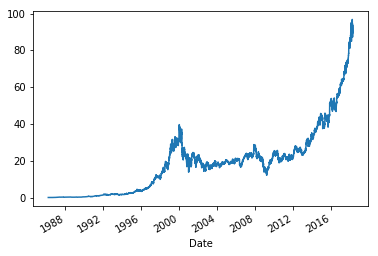

In [57]:
ms['Adj. Close'].plot() # adjusted close a historical plot

In [58]:
ms.index  # show the data was loaded with the DateTime as a index, now we can explore it

DatetimeIndex(['1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18',
               '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24',
               '1986-03-25', '1986-03-26',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=8076, freq=None)

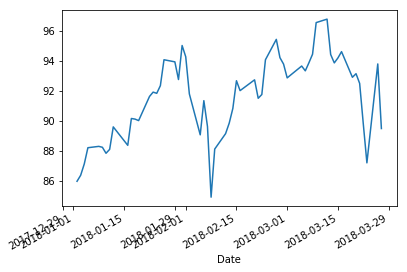

In [59]:
ms['2018']['Adj. Close'].plot() # now we plot just 2018 YEAR

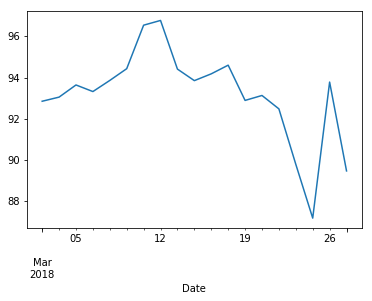

In [60]:
ms['2018-03']['Adj. Close'].plot() # now we plot just 2018-03 MONTH

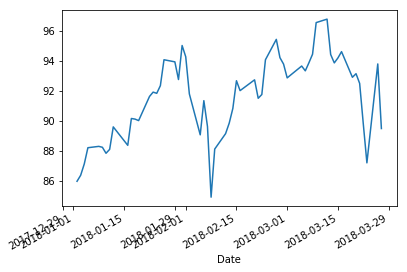

In [61]:
ms.loc['2018-01-01':'2018-03-31']['Adj. Close'].plot() # plotting an interval, slice of the data ( 3 MONTHS ).

In [64]:
ms_price = ms[['Adj. Close']] #combine info so we can analyse together
apple_price = apple[['Adj. Close']]
ms_price.rename(columns={'Adj. Close':'MSTF'}, inplace=True)
apple_price.rename (columns={'Adj. Close':'AAPL'}, inplace=True)

In [66]:
both_stocks = ms_price.join(apple_price, how='inner')

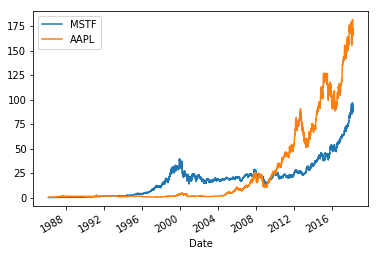

In [67]:
both_stocks.plot()

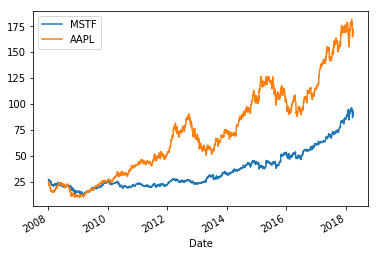

In [68]:
both_stocks.loc['2008':'2018'].plot() #itś clear that after 2010 Apple rocket up while MS grows

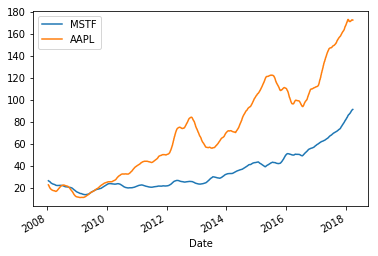

In [69]:
both_stocks['2008':'2018'].rolling(min_periods=10,window=60,center=False).mean().plot() #média , mean de 60

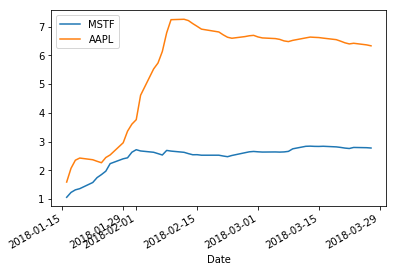

In [70]:
both_stocks['2018'].rolling(min_periods=10,window=60,center=False).std().plot() #desvio padrão Apple more volatile